In [1]:
import pickle
with open('data.picke','rb') as fw :
    전처리_된_데이터 = pickle.load(fw)

In [4]:
type(전처리_된_데이터)

dict

In [6]:
전처리_된_데이터.keys()

dict_keys(['학습_데이터', '학습_결과', '테스트_데이터', '테스트_결과', '검증_데이터', '검증_결과', '토큰', '단어수', '불용어', '입력길이'])

In [28]:
t_x=전처리_된_데이터['학습_데이터']
tt_x=전처리_된_데이터['테스트_데이터']
t_y=전처리_된_데이터['학습_결과']
tt_y=전처리_된_데이터['테스트_결과']
v_x=전처리_된_데이터['검증_데이터']
v_y=전처리_된_데이터['검증_결과']
n=전처리_된_데이터['단어수']
tk1=전처리_된_데이터['토큰']
stop_words=전처리_된_데이터['불용어']
max_w_l=전처리_된_데이터['입력길이']

In [37]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,TensorBoard
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=3)
mc=ModelCheckpoint('best_m2.h5',monitor='val_acc',mode='max',verbose=1,save_best_only=True)
t_bd=TensorBoard(log_dir="logs")

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [22]:
임배딩길이=128
뉴런수=128
d_out=0.5
ec=15
lr=0.001
배치크기=128

In [20]:
m=Sequential()
m.add(Embedding(n,임배딩길이,input_length=max_w_l))
m.add(layers.GRU(뉴런수,dropout=d_out,return_sequences=True))
m.add(layers.GRU(뉴런수//2,dropout=d_out))
m.add(Dense(1,activation='sigmoid'))
m.compile(optimizer=Adam(lr),loss='binary_crossentropy',metrics=['acc'])

In [23]:
hy=m.fit(t_x,t_y,epochs=ec,callbacks=[es,mc,t_bd],batch_size=배치크기,validation_data=(v_x,v_y))

Epoch 1/15
435/435 [==============================] - 73s 161ms/step - loss: 0.5240 - acc: 0.7330 - val_loss: 0.4732 - val_acc: 0.7762

Epoch 00001: val_acc improved from -inf to 0.77618, saving model to best_m2.h5
Epoch 2/15
435/435 [==============================] - 69s 159ms/step - loss: 0.4097 - acc: 0.8155 - val_loss: 0.4549 - val_acc: 0.7878

Epoch 00002: val_acc improved from 0.77618 to 0.78778, saving model to best_m2.h5
Epoch 3/15
435/435 [==============================] - 70s 161ms/step - loss: 0.3570 - acc: 0.8432 - val_loss: 0.4844 - val_acc: 0.7849

Epoch 00003: val_acc did not improve from 0.78778
Epoch 4/15
435/435 [==============================] - 71s 162ms/step - loss: 0.3146 - acc: 0.8652 - val_loss: 0.5007 - val_acc: 0.7781

Epoch 00004: val_acc did not improve from 0.78778
Epoch 5/15
435/435 [==============================] - 78s 178ms/step - loss: 0.2793 - acc: 0.8830 - val_loss: 0.5221 - val_acc: 0.7750

Epoch 00005: val_acc did not improve from 0.78778
Epoch 000

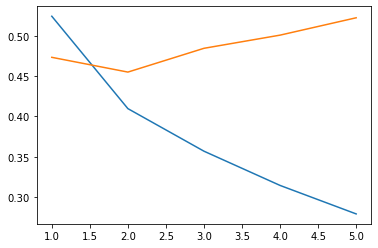

In [24]:
import matplotlib.pyplot as plt
x=range(1,len(hy.history['loss'])+1)
plt.plot(x,hy.history['loss'])
plt.plot(x,hy.history['val_loss'])

In [25]:
from tensorflow.keras.models import load_model
loaded_model = load_model('best_m2.h5')
loaded_model.evaluate(tt_x,tt_y)[1]

930/930 [==============================] - 17s 17ms/step - loss: 0.4551 - acc: 0.7885


0.7884796261787415

In [35]:
import re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
tk=Okt()
def 문장_전처리(문장):
    문장 = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', 문장)
    문장 = tk.morphs(문장, stem=True)
    문장 = [w for w in 문장 if not w in stop_words] 
    encoded = tk1.texts_to_sequences([문장])
    pad_new = pad_sequences(encoded, maxlen = max_w_l)
    score = float(loaded_model.predict(pad_new))
    if(score > 0.5):
        print(f"{score * 100:.2f}% 확률로 긍정 게임 리뷰입니다.\n")
    else:
        print(f"{(1 - score) * 100:.2f}% 확률로 부정 게임 리뷰입니다.\n")

In [36]:
문장_전처리('아니 튕기면 보상을 좀 해주던가 보스잡다가 튕긴건데 이걸 보상을 안해주네..')

95.46% 확률로 부정 게임 리뷰입니다.



In [41]:
m1=Sequential()
m1.add(Embedding(n,임배딩길이,input_length=max_w_l))
m1.add(layers.GRU(뉴런수,dropout=d_out,return_sequences=True))
m1.add(layers.GRU(뉴런수//2,dropout=d_out))
m1.add(Dense(1,activation='sigmoid'))
m1.compile(optimizer=Adam(lr),loss='binary_crossentropy',metrics=['acc'])

In [42]:
hy1=m1.fit(t_x,t_y,epochs=ec,callbacks=[es,mc,t_bd],batch_size=배치크기,validation_data=(v_x,v_y))

Epoch 1/15
435/435 [==============================] - 85s 188ms/step - loss: 0.5181 - acc: 0.7374 - val_loss: 0.4630 - val_acc: 0.7795

Epoch 00001: val_acc improved from 0.77084 to 0.77949, saving model to best_m2.h5
Epoch 2/15
435/435 [==============================] - 75s 172ms/step - loss: 0.4101 - acc: 0.8148 - val_loss: 0.4651 - val_acc: 0.7858

Epoch 00002: val_acc improved from 0.77949 to 0.78584, saving model to best_m2.h5
Epoch 3/15
435/435 [==============================] - 83s 190ms/step - loss: 0.3608 - acc: 0.8427 - val_loss: 0.4744 - val_acc: 0.7805

Epoch 00003: val_acc did not improve from 0.78584
Epoch 4/15
435/435 [==============================] - 82s 189ms/step - loss: 0.3182 - acc: 0.8647 - val_loss: 0.5106 - val_acc: 0.7793

Epoch 00004: val_acc did not improve from 0.78584
Epoch 00004: early stopping


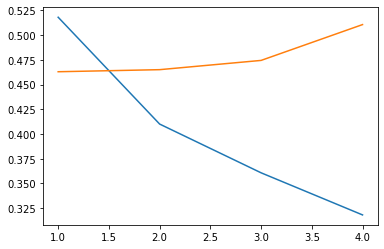

In [43]:
import matplotlib.pyplot as plt
x=range(1,len(hy1.history['loss'])+1)
plt.plot(x,hy1.history['loss'])
plt.plot(x,hy1.history['val_loss'])

In [44]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 13452), started 0:36:37 ago. (Use '!kill 13452' to kill it.)